# Code Lab 1B

Welcome to the next code lab of Day 1! 

In this code lab, you are going to use Keras - a high level Deep Learning framework developed by Google - to build and train a deep learning model. Keras is one of the fastest growing DL frameworks due to its user-friendliness and the fact that it runs on top of Tensorflow.

<img src='https://blog.keras.io/img/keras-tensorflow-logo.jpg' width="400">

We'll be working with MNIST and CIFAR10 - two popular datasets which are the "Hello World" equivalent for DL. Let's walk through the datasets together.

## Loading MNIST data

MNIST is a database of handwritten digits created by Yann Lecun in 1998. While it is an old dataset, it is still one of the commonly used ways to introduce the power of deep neural networks to students of DL today. The training set consists of 60,000 black-and-white images of handwritten digits of size 28 x 28, while the testing set consists of 10,000 images.

Your first task will be to load the images. This can be done easily in Keras as it is one of the datasets available in one of its modules. Refer [here](https://keras.io/datasets/#mnist-database-of-handwritten-digits) to see how to load the data. Note that loading the data might take some time.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Visualising the data

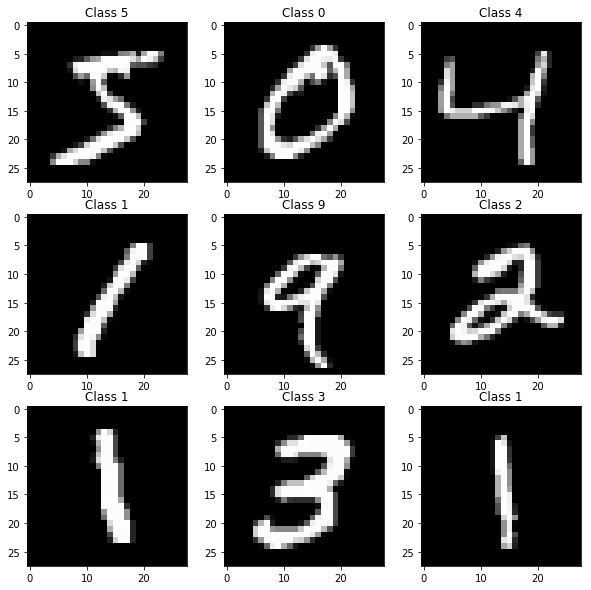

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    
plt.show()

In [4]:
print("y_train:", y_train)
print("y_test:", y_test)

y_train: [5 0 4 ... 5 6 8]
y_test: [7 2 1 ... 4 5 6]


### Format the data for training

Our neural network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784-dimensional vector. We'll also scale the inputs to be in the range (0-1) rather than (0-255).

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape:", X_train.shape)
print("Testing matrix shape:", X_test.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


We also need to modify the target labels to one-hot encoding, i.e.

    0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]  
    1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]  
    2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]  
    etc.

This will allow Keras to compute the categorical cross entropy in order to find the loss during training.

In [17]:
from keras.utils import np_utils

NUM_CLASSES = 10

Y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: (60000, 10)
Y_test shape: (10000, 10)


Run the code block below to check that your target shapes are correct before proceeding. If you get an AssertionError, you need to visit the previous code block and debug.

In [16]:
assert Y_train.shape == (60000, 10)
assert Y_test.shape == (10000,10)

## Build the Neural Network

Now we'll build a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/wxs/keras-mnist-tutorial/8824b7b56963a92ef879f09acd99cf3a210db2b8/figure.png">

To build deep learning models in Keras, there are two APIs that we can use. We'll learn how to use the Sequential API today and on day 2 you'll be introduced to the Model(Functional API).  

The Sequential API is very straightforward and intutive. Any deep learning model you want to create is just a linear stack of layers, and the way you stack one layer on top of another is just by calling `model.add(...)`.  

Throughout this workshop, you'll be introduced to the different layers available in Keras. In fact, with Keras you can even create your own custom (Lambda) layers. For the purposes of this code lab though, you only need to know the `Dense` layer. Take a moment to read the documentation [here](https://keras.io/layers/core/)

The first thing you're going to do is to instantiate your model. You will then need to add the following layers.
- `Dense` layer with 512 units and ReLU activation function
- `Dense` layer with 512 units and ReLU activation function
- `Dense` layer with 10 units and Softmax activation function

Give it a go!

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compiling the model

The next step after creating the model is to compile it, so training the model can run efficiently on CPU and GPU without the overhead of the Python interpreter. 

When compiing a model, Keras asks you to specify your __loss function__ , __optimizer__, and __metrics__ to track during training. The loss function we'll use here is called categorical crossentropy, and is a loss function well-suited to comparing two probability distributions. The optimizer is up to you to choose, but we recommend using "adam". For metrics, keep track of accuracy. Refer to the documentation [here](https://keras.io/getting-started/sequential-model-guide/). 

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model!

Alright! This is the fun part; you can feed the training data loaded in earlier into this model and it will learn to classify digits.

To do this, you'll need to use the `fit` function in Keras. Refer to the documentation [here](https://keras.io/models/sequential/).

In [25]:
NUM_EPOCHS = 4
BATCH_SIZE = 128
VERBOSITY = 1

print("Number of epochs:", NUM_EPOCHS)
print("Batch size:", BATCH_SIZE)
print("Verbosity:", VERBOSITY)

Number of epochs: 4
Batch size: 128
Verbosity: 1


In [31]:
model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS,
                    verbose=VERBOSITY,
                    shuffle=True)

Epoch 1/4
60000/60000 [==============================] - 1s 17us/step - loss: 0.0258 - acc: 0.9911
Epoch 2/4
60000/60000 [==============================] - 1s 17us/step - loss: 0.0224 - acc: 0.9925
Epoch 3/4
60000/60000 [==============================] - 1s 17us/step - loss: 0.0202 - acc: 0.9932
Epoch 4/4
60000/60000 [==============================] - 1s 17us/step - loss: 0.0149 - acc: 0.9953


## Finally, evaluate its performance

In [28]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 19us/step
Test loss: 0.07140096148285957
Test accuracy: 0.978


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [34]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)
print("Predicted Classes:", predicted_classes)
print("Ground Truth:", y_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Predicted Classes: [7 2 1 ... 4 5 6]
Ground Truth: [7 2 1 ... 4 5 6]


Legend: (Predicted Class, Actual Class)


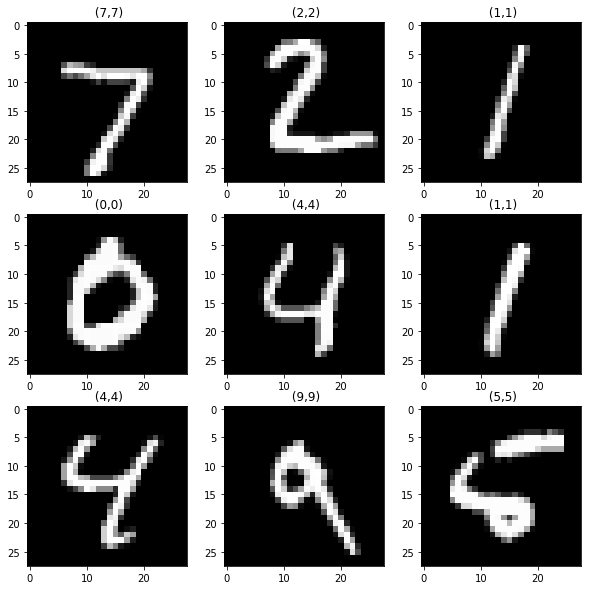

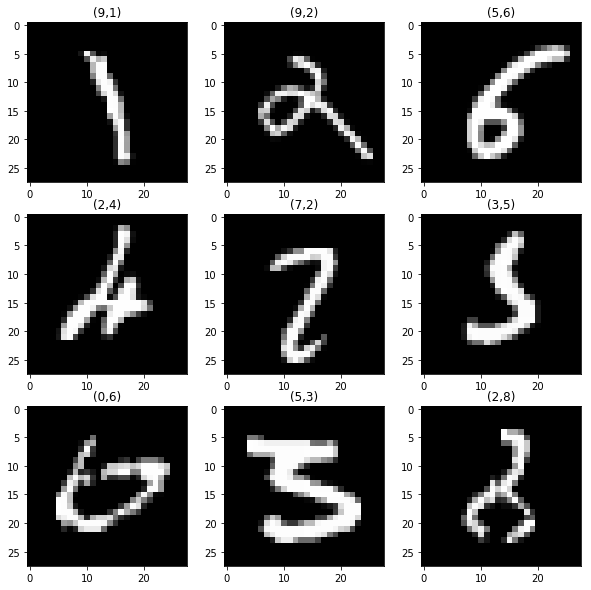

In [41]:
print("Legend: (Predicted Class, Actual Class)")
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(" ({},{})".format(predicted_classes[correct], y_test[correct]))
    
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("({},{})".format(predicted_classes[incorrect], y_test[incorrect]))

Well done! If this was your first ever deep learning project, congratulations! You've just taught a computer how to recognise digits from raw pixels. Isn't that amazing? It's not as if a computer has any notion of what a digits "look like" in real-life - they've just internalised the pixel representations via stochastic gradient descent.

Alright, if you have time, we strongly encourage you to try a slightly more challenging dataset - CIFAR10. You can just follow the steps above. You can start by downloading it the same way you downloaded MNIST, from the Keras datasets module. Have fun! 